SARIMAX Component (Linear Time Series Patterns):

Captures linear trends and seasonality

Handles autoregressive patterns (how past values influence future values)

Models moving average components (error terms' relationships)

Good at capturing regular, predictable patterns



Gradient Boosting Component (Non-linear Patterns):

Works on the residuals (errors) from SARIMAX

Captures complex interactions between features

Learns non-linear relationships

Adapts to local patterns that SARIMAX might miss


Why This Combination Works:

SARIMAX handles the "big picture" time series patterns

GradientBoosting catches the subtle patterns in the errors

Together they provide more accurate predictions than either model alone



Advantages of this Approach:

Better handling of both linear and non-linear patterns
More robust to different types of data patterns
Can capture both long-term trends and short-term fluctuations
Provides interpretability through component analysis

## Fine tuning process, it will run 500 trails, which take a long time, so you can skip this cell, and only use the best hyperparametes to run next cell. To improve the performance, you could increase the trial count and the number of cross-validation folds to explore a wider parameter space, but it will take longer time.


Loading data...
Checking and preprocessing data...
Preparing data and engineering features...
Creating advanced features...


[I 2024-11-03 13:21:30,909] A new study created in memory with name: no-name-5b020ba9-c977-41d5-b6e6-c06fd3d34f5c


Using rolling windows of [6, 12, 24] blocks for [1, 2, 4] hour periods
Scaling features...

Starting hyperparameter tuning...


[I 2024-11-03 13:24:25,568] Trial 0 finished with value: 2653991517364.5234 and parameters: {'p': 0, 'd': 0, 'q': 2, 'n_estimators': 85, 'learning_rate': 0.20206208774586748, 'max_depth': 6, 'subsample': 0.621612005891734, 'min_samples_split': 20, 'min_samples_leaf': 9}. Best is trial 0 with value: 2653991517364.5234.
[I 2024-11-03 13:28:47,725] Trial 1 finished with value: 2653991517364.8936 and parameters: {'p': 1, 'd': 0, 'q': 0, 'n_estimators': 190, 'learning_rate': 0.011208397932445045, 'max_depth': 6, 'subsample': 0.8733014464376408, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 0 with value: 2653991517364.5234.
[I 2024-11-03 13:31:15,386] Trial 2 finished with value: 2653991517363.851 and parameters: {'p': 1, 'd': 0, 'q': 1, 'n_estimators': 61, 'learning_rate': 0.19656257278643263, 'max_depth': 6, 'subsample': 0.8851964890671318, 'min_samples_split': 18, 'min_samples_leaf': 10}. Best is trial 2 with value: 2653991517363.851.
[I 2024-11-03 13:33:54,064] Trial 3 fi


Best hyperparameters:
p: 3
d: 0
q: 3
n_estimators: 232
learning_rate: 0.29540444469518157
max_depth: 3
subsample: 0.6803062149077873
min_samples_split: 12
min_samples_leaf: 4

Best MAPE: 2653991517357.0303%

Running cross-validation with best parameters...

Training fold 1/5

Fold 1 Metrics:
MAE: 2.7266
RMSE: 4.0248
R²: -0.1452
MAPE: 31.1080%
Directional Accuracy: 31.4685%
Theil's U: 0.6614


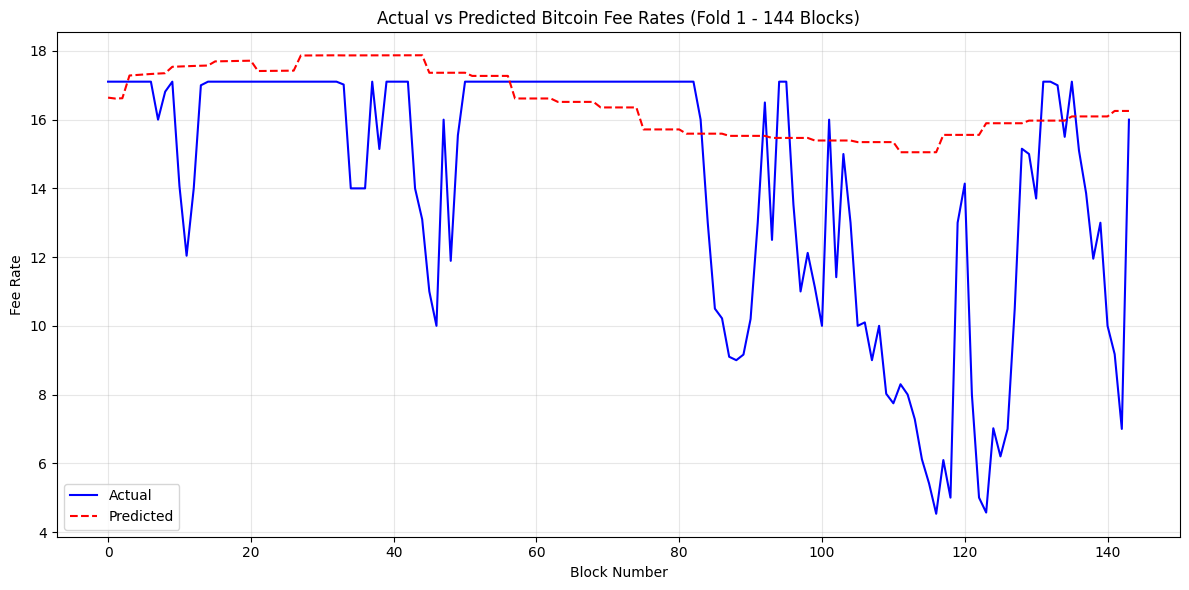


Training fold 2/5

Fold 2 Metrics:
MAE: 3.8658
RMSE: 4.3439
R²: 0.0081
MAPE: 46.8213%
Directional Accuracy: 8.3916%
Theil's U: 0.5057


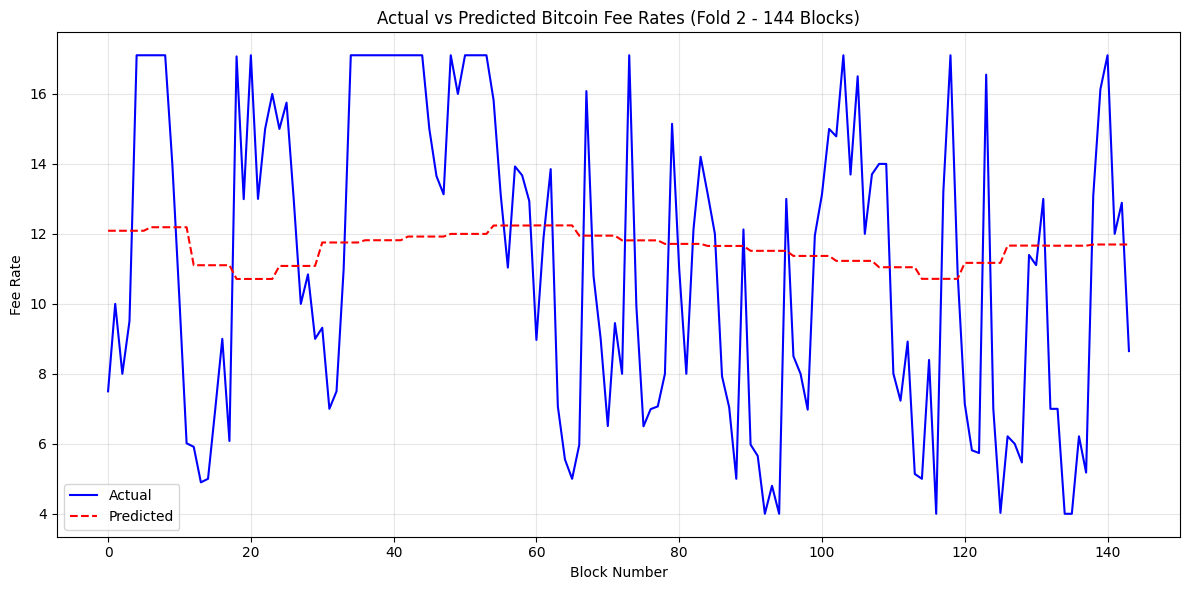


Training fold 3/5

Fold 3 Metrics:
MAE: 2.5615
RMSE: 3.1212
R²: 0.0256
MAPE: 36.4302%
Directional Accuracy: 50.3497%
Theil's U: 0.5121


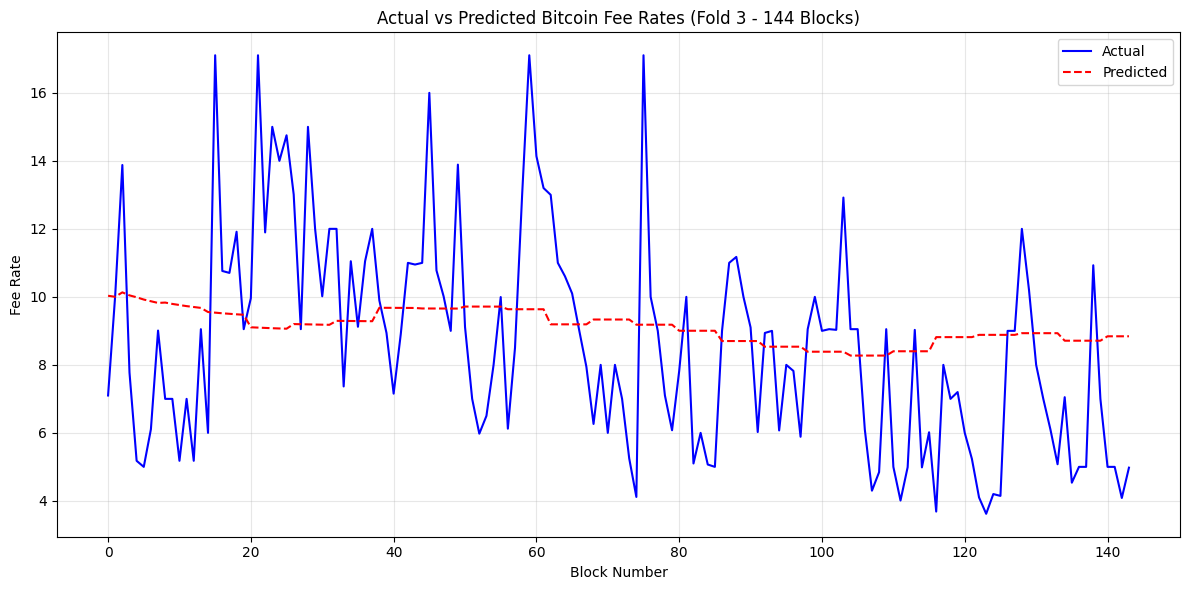


Training fold 4/5

Fold 4 Metrics:
MAE: 2.1975
RMSE: 3.3379
R²: -0.3254
MAPE: 29.9479%
Directional Accuracy: 43.3566%
Theil's U: 0.6086


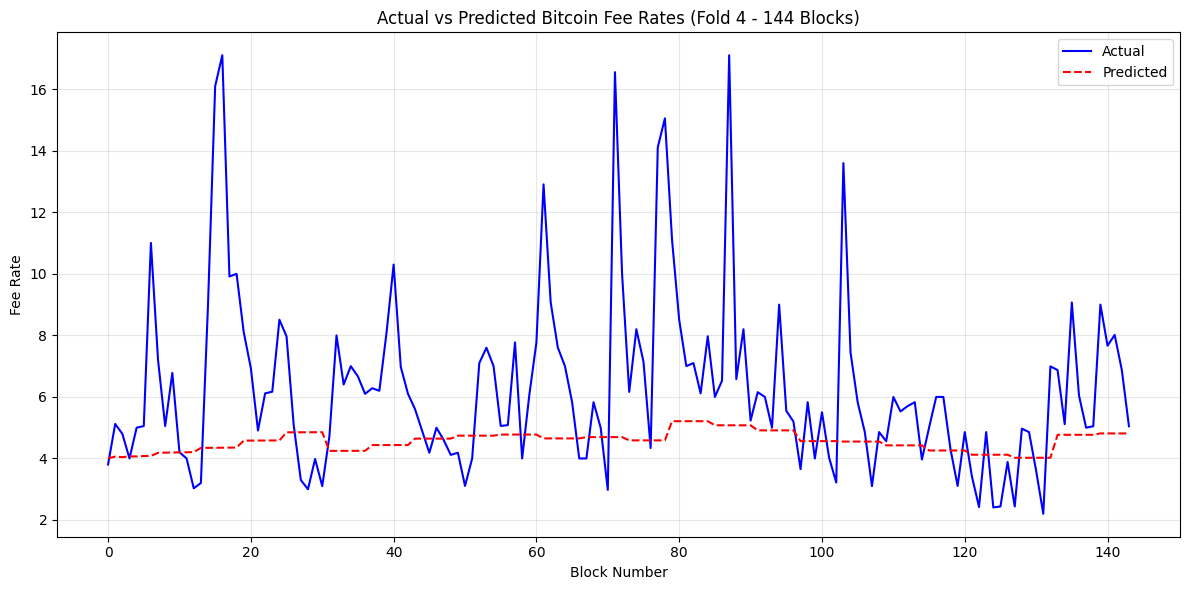


Training fold 5/5

Fold 5 Metrics:
MAE: 2.7092
RMSE: 3.5053
R²: 0.0025
MAPE: 66.4119%
Directional Accuracy: 39.8601%
Theil's U: 0.6048


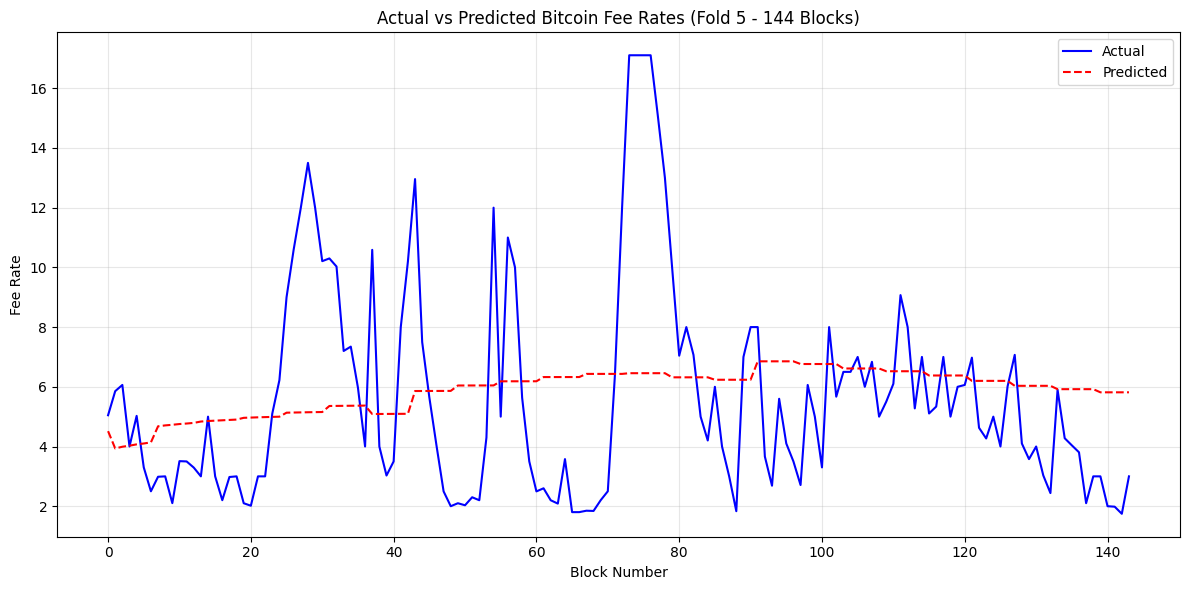

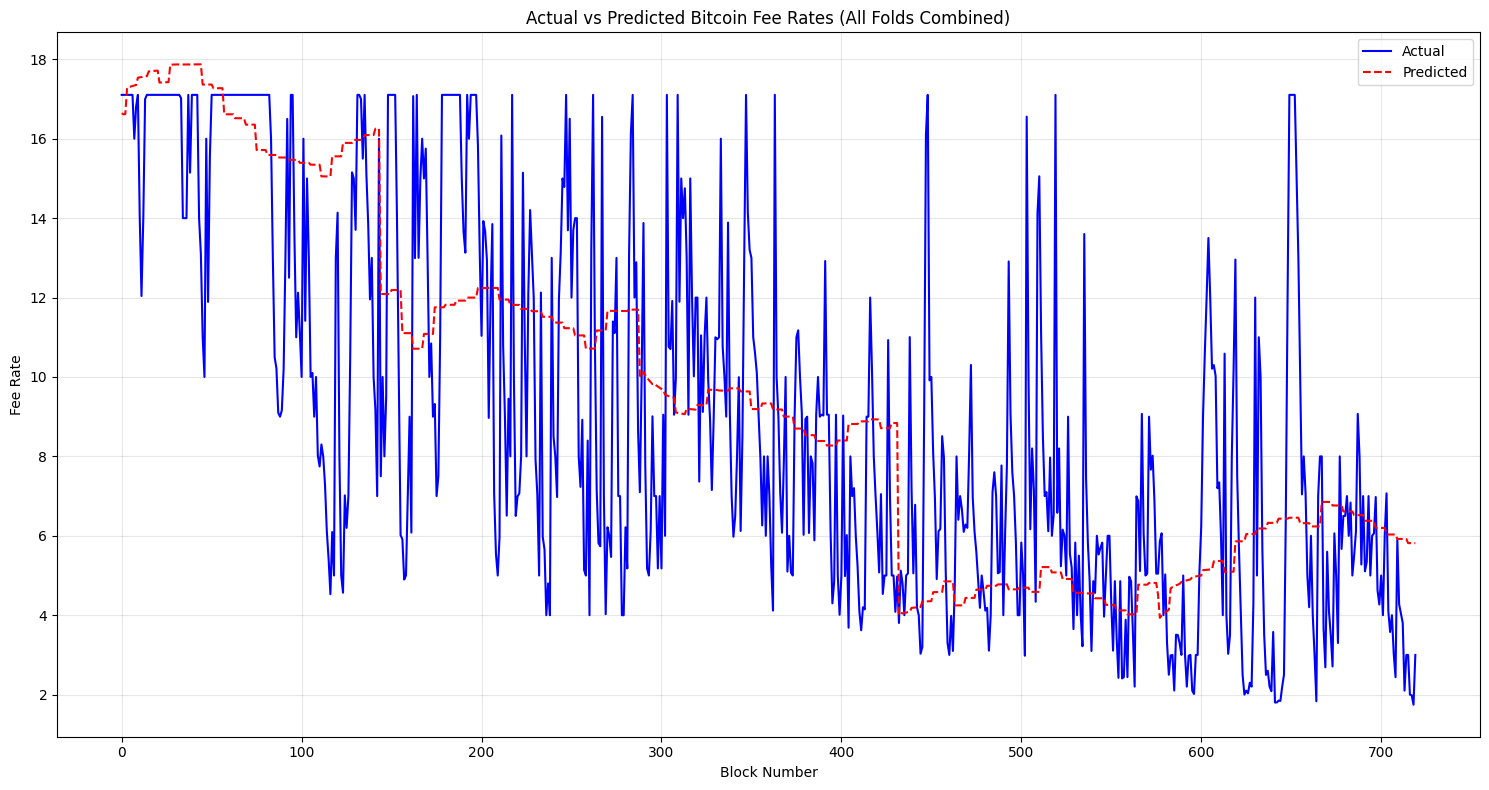


Detailed metrics for each fold:
   Fold       MAE      RMSE        R2       MAPE  DirectionalAccuracy  \
0     1  2.726582  4.024831 -0.145176  31.108049            31.468531   
1     2  3.865769  4.343869  0.008051  46.821328             8.391608   
2     3  2.561460  3.121190  0.025588  36.430234            50.349650   
3     4  2.197464  3.337926 -0.325427  29.947931            43.356643   
4     5  2.709154  3.505292  0.002471  66.411906            39.860140   

    TheilsU  
0  0.661355  
1  0.505747  
2  0.512141  
3  0.608604  
4  0.604808  

Final Cross-Validation Performance with Tuned Parameters:
MAE: 2.8121 (±0.5601)
RMSE: 3.6666 (±0.4513)
R2: -0.0869 (±0.1341)
MAPE: 42.1439 (±13.5203)
DA: 34.6853 (±14.4848)
THEIL_U: 0.5785 (±0.0603)

Total execution time: 96717.68 seconds

Saving results...
Results saved successfully!


In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import time
import random
import ast
import optuna
import warnings
from copy import deepcopy

# Suppress warnings
warnings.filterwarnings('ignore')

def set_seed(seed=42):
    """Set random seeds for reproducibility"""
    random.seed(seed)
    np.random.seed(seed)

def preprocess_and_check_data(df):
    """Preprocess and validate data"""
    print("Checking and preprocessing data...")
    
    # Check for NaN values
    if df.isnull().any().any():
        print("Warning: NaN values found in data")
        df = df.fillna(method='ffill').fillna(method='bfill')
    
    # Check for infinite values
    if np.isinf(df.select_dtypes(include=np.number)).any().any():
        print("Warning: Infinite values found in data")
        df = df.replace([np.inf, -np.inf], np.nan)
        df = df.fillna(method='ffill').fillna(method='bfill')
    
    # Ensure target variable is positive (for MAPE calculation)
    if (df['block_median_fee_rate'] <= 0).any():
        print("Warning: Non-positive values found in target variable")
        df = df[df['block_median_fee_rate'] > 0]
    
    return df
    
def preprocess_list_columns(df):
    """Convert string representations of lists to actual numerical features"""
    list_columns = []
    
    # Identify columns containing lists
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                if isinstance(ast.literal_eval(df[col].iloc[0]), list):
                    list_columns.append(col)
            except (ValueError, SyntaxError):
                continue
    
    # Process list columns
    for col in list_columns:
        try:
            # Convert string representations to actual lists
            lists = df[col].apply(ast.literal_eval)
            
            # Create new features from lists
            df[f'{col}_mean'] = lists.apply(lambda x: np.mean(x))
            df[f'{col}_std'] = lists.apply(lambda x: np.std(x))
            df[f'{col}_max'] = lists.apply(lambda x: max(x))
            df[f'{col}_min'] = lists.apply(lambda x: min(x))
            df[f'{col}_range'] = lists.apply(lambda x: max(x) - min(x))
            df[f'{col}_sum'] = lists.apply(lambda x: sum(x))
            
            # Drop the original list column
            df = df.drop(columns=[col])
        except Exception as e:
            print(f"Warning: Error processing list column {col}: {str(e)}")
            continue
    
    return df

def create_advanced_features(df):
    """Create advanced features including time-based and rolling statistics"""
    print("Creating advanced features...")
    
    try:
        # First preprocess any list columns
        df = preprocess_list_columns(df)
        
        # Time-based features
        df['hour_sin'] = np.sin(2 * np.pi * df.index.hour / 24)
        df['hour_cos'] = np.cos(2 * np.pi * df.index.hour / 24)
        df['day_sin'] = np.sin(2 * np.pi * df.index.dayofweek / 7)
        df['day_cos'] = np.cos(2 * np.pi * df.index.dayofweek / 7)
        
        # Get numerical columns
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        
        # Calculate block interval
        avg_interval = df.index.to_series().diff().mean().total_seconds() / 60
        BLOCK_INTERVAL_MINUTES = round(avg_interval)
        TIME_WINDOWS_HOURS = [1, 2, 4]  # Desired time windows in hours
        
        # Calculate windows based on actual data frequency
        windows = [int((60 * hours) / BLOCK_INTERVAL_MINUTES) for hours in TIME_WINDOWS_HOURS]
        print(f"Using rolling windows of {windows} blocks for {TIME_WINDOWS_HOURS} hour periods")
        
        # Rolling statistics for numerical columns
        for col in numeric_cols:
            if col != 'block_median_fee_rate':  # Skip target variable
                for window, hours in zip(windows, TIME_WINDOWS_HOURS):
                    df[f'{col}_mean_{hours}h'] = df[col].rolling(window=window, min_periods=1).mean()
                    df[f'{col}_std_{hours}h'] = df[col].rolling(window=window, min_periods=1).std()
        
        # Feature interactions
        if 'mempool_size_mb' in df.columns and 'transaction_count' in df.columns:
            df['mempool_pressure'] = df['mempool_size_mb'] * df['transaction_count']
        
        if 'bitcoin_price_usd' in df.columns:
            df['price_volatility'] = df['bitcoin_price_usd'].pct_change().rolling(12, min_periods=1).std()
        
        # Fill NaN values
        for col in df.columns:
            if col.endswith(('_mean', '_std', '_volatility')):
                df[col] = df[col].fillna(method='bfill').fillna(method='ffill')
            else:
                df[col] = df[col].fillna(df[col].mean())
        
        return df
    
    except Exception as e:
        print(f"Error in feature creation: {str(e)}")
        raise

def forecast_exog_advanced(X, steps):
    """Forecast exogenous variables for future predictions"""
    try:
        forecast = pd.DataFrame(index=pd.date_range(start=X.index[-1] + pd.Timedelta(minutes=10), 
                                                  periods=steps, freq='10T'))
        
        for col in X.columns:
            if col.startswith(('hour_', 'day_')):
                if 'hour_' in col:
                    hour = forecast.index.hour
                    forecast[col] = np.sin(2 * np.pi * hour / 24) if 'sin' in col else np.cos(2 * np.pi * hour / 24)
                else:
                    day = forecast.index.dayofweek
                    forecast[col] = np.sin(2 * np.pi * day / 7) if 'sin' in col else np.cos(2 * np.pi * day / 7)
            else:
                # Use exponential smoothing for numerical features
                alpha = 0.7
                last_values = X[col].iloc[-10:]
                smoothed_value = last_values.ewm(alpha=alpha).mean().iloc[-1]
                forecast[col] = smoothed_value
        
        return forecast
    
    except Exception as e:
        print(f"Error in forecasting exogenous variables: {str(e)}")
        raise

class HybridModel:
    """Hybrid model combining SARIMAX and Gradient Boosting"""
    def __init__(self, sarimax_order=(1,1,1), gb_params=None):
        self.sarimax_order = sarimax_order
        self.sarimax_model = None
        
        default_gb_params = {
            'n_estimators': 100,
            'learning_rate': 0.1,
            'max_depth': 3,
            'subsample': 0.8,
            'random_state': 42
        }
        
        if gb_params is not None:
            default_gb_params.update(gb_params)
            
        self.gb_model = GradientBoostingRegressor(**default_gb_params)
        
    def fit(self, y, exog):
        try:
            # Convert to numpy arrays
            y = np.array(y)
            exog = np.array(exog)
            
            # Fit SARIMAX
            self.sarimax_model = SARIMAX(y, exog=exog, order=self.sarimax_order)
            self.sarimax_results = self.sarimax_model.fit(disp=False)
            
            # Get SARIMAX residuals
            sarimax_pred = self.sarimax_results.get_prediction(start=0, exog=exog)
            residuals = y - sarimax_pred.predicted_mean
            
            # Check for NaN values
            if np.any(np.isnan(residuals)):
                raise ValueError("NaN values in SARIMAX residuals")
            
            # Fit GradientBoosting on residuals
            self.gb_model.fit(exog, residuals)
            
        except Exception as e:
            print(f"Error in model fitting: {str(e)}")
            raise
        
    def predict(self, exog):
        try:
            sarimax_pred = self.sarimax_results.get_prediction(
                start=len(self.sarimax_results.fittedvalues), 
                end=len(self.sarimax_results.fittedvalues) + len(exog) - 1,
                exog=exog
            )
            gb_pred = self.gb_model.predict(exog)
            return sarimax_pred.predicted_mean + gb_pred
        
        except Exception as e:
            print(f"Error in prediction: {str(e)}")
            raise

class HybridModelTuner:
    """Hyperparameter tuner for the hybrid model"""
    def __init__(self, y, exog, cv_splits=5):
        self.y = y
        self.exog = exog
        self.cv_splits = cv_splits
        self.best_params = None
        self.best_score = float('inf')
        
    def objective(self, trial):
        try:
            # SARIMAX parameters
            sarimax_order = (
                trial.suggest_int('p', 0, 3),
                trial.suggest_int('d', 0, 2),
                trial.suggest_int('q', 0, 3)
            )
            
            # GradientBoosting parameters
            gb_params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'max_depth': trial.suggest_int('max_depth', 2, 8),
                'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
            }
            
            # Time series cross-validation
            tscv = TimeSeriesSplit(n_splits=self.cv_splits)
            scores = []
            
            for train_idx, val_idx in tscv.split(self.exog):
                # Initialize model with trial parameters
                model = HybridModel(sarimax_order=sarimax_order, gb_params=gb_params)
                
                # Fit and predict
                train_y = self.y.iloc[train_idx]
                train_X = self.exog.iloc[train_idx]
                val_y = self.y.iloc[val_idx]
                val_X = self.exog.iloc[val_idx]
                
                model.fit(train_y, train_X)
                predictions = model.predict(val_X)
                
                # Ensure predictions and val_y are numpy arrays
                predictions = np.array(predictions).astype(float)
                val_y = np.array(val_y).astype(float)
                
                # Check for NaN values
                if np.any(np.isnan(predictions)) or np.any(np.isnan(val_y)):
                    return float('inf')
                
                # Calculate error
                mape = mean_absolute_percentage_error(val_y, predictions)
                
                if np.isfinite(mape):
                    scores.append(mape)
            
            if len(scores) == 0:
                return float('inf')
                
            mean_score = np.mean(scores)
            return mean_score if np.isfinite(mean_score) else float('inf')
            
        except Exception as e:
            print(f"Trial failed with error: {str(e)}")
            return float('inf')
    
    def tune(self, n_trials=100):
        try:
            study = optuna.create_study(direction='minimize')
            study.optimize(self.objective, n_trials=n_trials)
            
            if study.best_trial is None:
                raise ValueError("No successful trials completed")
            
            self.best_params = study.best_params
            self.best_score = study.best_value
            
            return study
            
        except Exception as e:
            print(f"Error in hyperparameter tuning: {str(e)}")
            raise

# Evaluation Metrics
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error with proper handling of types"""
    y_true = np.array(y_true).astype(float)
    y_pred = np.array(y_pred).astype(float)
    
    # Handle division by zero
    mask = y_true != 0
    if not np.any(mask):
        return float('inf')
    
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def directional_accuracy(y_true, y_pred):
    """Calculate Directional Accuracy"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean((np.diff(y_true) * np.diff(y_pred)) > 0) * 100

def theil_u(y_true, y_pred):
    """Calculate Theil's U statistic"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    y_true_pct = (y_true[1:] - y_true[:-1]) / y_true[:-1]
    y_pred_pct = (y_pred[1:] - y_true[:-1]) / y_true[:-1]
    
    numerator = np.sqrt(np.mean((y_true_pct - y_pred_pct)**2))
    denominator = np.sqrt(np.mean(y_true_pct**2)) + np.sqrt(np.mean(y_pred_pct**2))
    
    return numerator / denominator


# Plotting Functions
def plot_fold_results(y_true, y_pred, fold_idx):
    """Plot results for a single fold"""
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_true)), y_true, label='Actual', color='blue')
    plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='--')
    plt.title(f'Actual vs Predicted Bitcoin Fee Rates (Fold {fold_idx + 1} - 144 Blocks)')
    plt.xlabel('Block Number')
    plt.ylabel('Fee Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_all_folds(all_y_true, all_y_pred):
    """Plot results for all folds combined"""
    plt.figure(figsize=(15, 8))
    plt.plot(range(len(all_y_true)), all_y_true, label='Actual', color='blue')
    plt.plot(range(len(all_y_pred)), all_y_pred, label='Predicted', color='red', linestyle='--')
    plt.title('Actual vs Predicted Bitcoin Fee Rates (All Folds Combined)')
    plt.xlabel('Block Number')
    plt.ylabel('Fee Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def run_improved_model_with_tuning(df, test_size=144, n_splits=5, n_trials=50):
    """Main function to run the improved model with hyperparameter tuning"""
    try:
        # Prepare data
        print("Preparing data and engineering features...")
        df = create_advanced_features(df)
        features = [col for col in df.columns if col != 'block_median_fee_rate']
        target = 'block_median_fee_rate'
        
        X = df[features]
        y = df[target]
        
        # Scale features
        print("Scaling features...")
        scaler = RobustScaler()
        X_scaled = pd.DataFrame(
            scaler.fit_transform(X),
            columns=X.columns,
            index=X.index
        )
        
        # Tune hyperparameters
        print("\nStarting hyperparameter tuning...")
        tuner = HybridModelTuner(y, X_scaled)
        study = tuner.tune(n_trials=n_trials)
        
        print("\nBest hyperparameters:")
        for param, value in study.best_params.items():
            print(f"{param}: {value}")
        print(f"\nBest MAPE: {study.best_value:.4f}%")
        
        # Extract best parameters
        best_sarimax_order = (
            study.best_params['p'],
            study.best_params['d'],
            study.best_params['q']
        )
        
        best_gb_params = {
            'n_estimators': study.best_params['n_estimators'],
            'learning_rate': study.best_params['learning_rate'],
            'max_depth': study.best_params['max_depth'],
            'subsample': study.best_params['subsample'],
            'min_samples_split': study.best_params['min_samples_split'],
            'min_samples_leaf': study.best_params['min_samples_leaf']
        }
        
        # Run cross-validation with best parameters
        print("\nRunning cross-validation with best parameters...")
        metrics = {metric: [] for metric in ['mae', 'rmse', 'r2', 'mape', 'da', 'theil_u']}
        all_y_true = []
        all_y_pred = []
        
        n_total = len(X_scaled)
        for fold_idx in range(n_splits):
            print(f"\nTraining fold {fold_idx+1}/{n_splits}")
            
            train_end = n_total - (n_splits - fold_idx) * test_size
            test_start = train_end
            test_end = test_start + test_size
            
            # Split data
            train_X = X_scaled.iloc[:train_end]
            train_y = y.iloc[:train_end]
            test_y = y.iloc[test_start:test_end]
            
            # Initialize and fit model with best parameters
            model = HybridModel(sarimax_order=best_sarimax_order, gb_params=best_gb_params)
            model.fit(train_y, train_X)
            
            # Generate forecasts
            future_exog = forecast_exog_advanced(train_X, test_size)
            predictions = model.predict(future_exog)
            
            # Store and evaluate results
            y_true = test_y.values[:test_size]
            y_pred = predictions[:test_size]
            
            all_y_true.extend(y_true)
            all_y_pred.extend(y_pred)
            
            # Calculate metrics
            metrics['mae'].append(mean_absolute_error(y_true, y_pred))
            metrics['rmse'].append(np.sqrt(mean_squared_error(y_true, y_pred)))
            metrics['r2'].append(r2_score(y_true, y_pred))
            metrics['mape'].append(mean_absolute_percentage_error(y_true, y_pred))
            metrics['da'].append(directional_accuracy(y_true, y_pred))
            metrics['theil_u'].append(theil_u(y_true, y_pred))
            
            # Print metrics for current fold
            print(f"\nFold {fold_idx + 1} Metrics:")
            print(f"MAE: {metrics['mae'][-1]:.4f}")
            print(f"RMSE: {metrics['rmse'][-1]:.4f}")
            print(f"R²: {metrics['r2'][-1]:.4f}")
            print(f"MAPE: {metrics['mape'][-1]:.4f}%")
            print(f"Directional Accuracy: {metrics['da'][-1]:.4f}%")
            print(f"Theil's U: {metrics['theil_u'][-1]:.4f}")
            
            # Plot results for current fold
            plot_fold_results(y_true, y_pred, fold_idx)
        
        # Plot all folds combined
        plot_all_folds(all_y_true, all_y_pred)
        
        # Create DataFrame with metrics for each fold
        metrics_df = pd.DataFrame({
            'Fold': range(1, n_splits + 1),
            'MAE': metrics['mae'],
            'RMSE': metrics['rmse'],
            'R2': metrics['r2'],
            'MAPE': metrics['mape'],
            'DirectionalAccuracy': metrics['da'],
            'TheilsU': metrics['theil_u']
        })
        
        print("\nDetailed metrics for each fold:")
        print(metrics_df)
        
        # Print final results
        print("\nFinal Cross-Validation Performance with Tuned Parameters:")
        for metric, values in metrics.items():
            print(f"{metric.upper()}: {np.mean(values):.4f} (±{np.std(values):.4f})")
        
        return metrics, all_y_true, all_y_pred, study, metrics_df
    
    except Exception as e:
        print(f"Error in model training: {str(e)}")
        raise

if __name__ == "__main__":
    try:
        # Load data
        print("Loading data...")
        df = pd.read_csv('real_time_cleaned.csv')
        df['block_time'] = pd.to_datetime(df['block_time'])
        df = df.sort_values('block_time').set_index('block_time')
        
        # Preprocess data
        df = preprocess_and_check_data(df)

        # Set random seed and start timer
        set_seed(42)
        start = time.time()

        # Run the improved model with tuning
        n_trials = 500  # Number of hyperparameter optimization trials
        metrics, all_y_true, all_y_pred, study, metrics_df = run_improved_model_with_tuning(
            df, 
            test_size=144, 
            n_splits=5,
            n_trials=n_trials
        )

        # Print execution time
        end = time.time()
        print(f"\nTotal execution time: {end-start:.2f} seconds")

        # Save results
        print("\nSaving results...")
        
        # Save best parameters
        best_params = pd.DataFrame([study.best_params])
        best_params.to_csv('best_parameters.csv', index=False)
        
        # Save metrics
        metrics_df.to_csv('cross_validation_metrics.csv', index=False)
        
        # Save predictions
        predictions_df = pd.DataFrame({
            'actual': all_y_true,
            'predicted': all_y_pred
        })
        predictions_df.to_csv('predictions.csv', index=False)
        
        print("Results saved successfully!")
        
    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        raise



50 trails :
Best hyperparameters:
p: 3
d: 0
q: 1
n_estimators: 145
learning_rate: 0.1477904886684632
max_depth: 2
subsample: 0.8044950252252036
min_samples_split: 6
min_samples_leaf: 4

Final Cross-Validation Performance with Tuned Parameters:
MAE: 2.7877 (±0.5538)
RMSE: 3.6280 (±0.5082)
R2: -0.0633 (±0.1615)
MAPE: 44.0066 (±18.3010)
DA: 26.2937 (±7.8446)
THEIL_U: 0.5798 (±0.0621)

Total execution time: 9832.61 seconds


500 trails: 

Best hyperparameters:
p: 3
d: 0
q: 3
n_estimators: 232
learning_rate: 0.29540444469518157
max_depth: 3
subsample: 0.6803062149077873
min_samples_split: 12
min_samples_leaf: 4


Final Cross-Validation Performance with Tuned Parameters:
MAE: 2.8121 (±0.5601)
RMSE: 3.6666 (±0.4513)
R2: -0.0869 (±0.1341)
MAPE: 42.1439 (±13.5203)
DA: 34.6853 (±14.4848)
THEIL_U: 0.5785 (±0.0603)

Total execution time: 96717.68 seconds



## Cross Validation with Best Hypeparameters

Loading data...
Checking and preprocessing data...
Preparing data and engineering features...
Creating advanced features...
Using rolling windows of [6, 12, 24] blocks for [1, 2, 4] hour periods
Scaling features...

Running cross-validation with best parameters...

Training fold 1/5

Fold 1 Metrics:
MAE: 2.7266
RMSE: 4.0248
R²: -0.1452
MAPE: 31.1080%
Directional Accuracy: 31.4685%
Theil's U: 0.6614


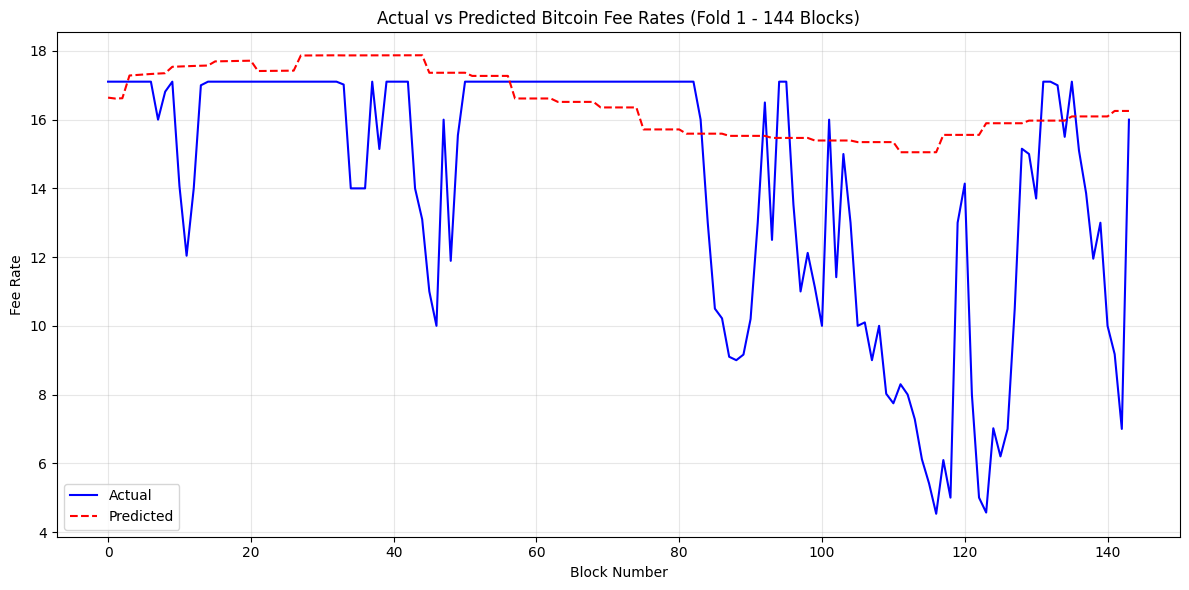


Training fold 2/5

Fold 2 Metrics:
MAE: 3.8658
RMSE: 4.3439
R²: 0.0081
MAPE: 46.8213%
Directional Accuracy: 8.3916%
Theil's U: 0.5057


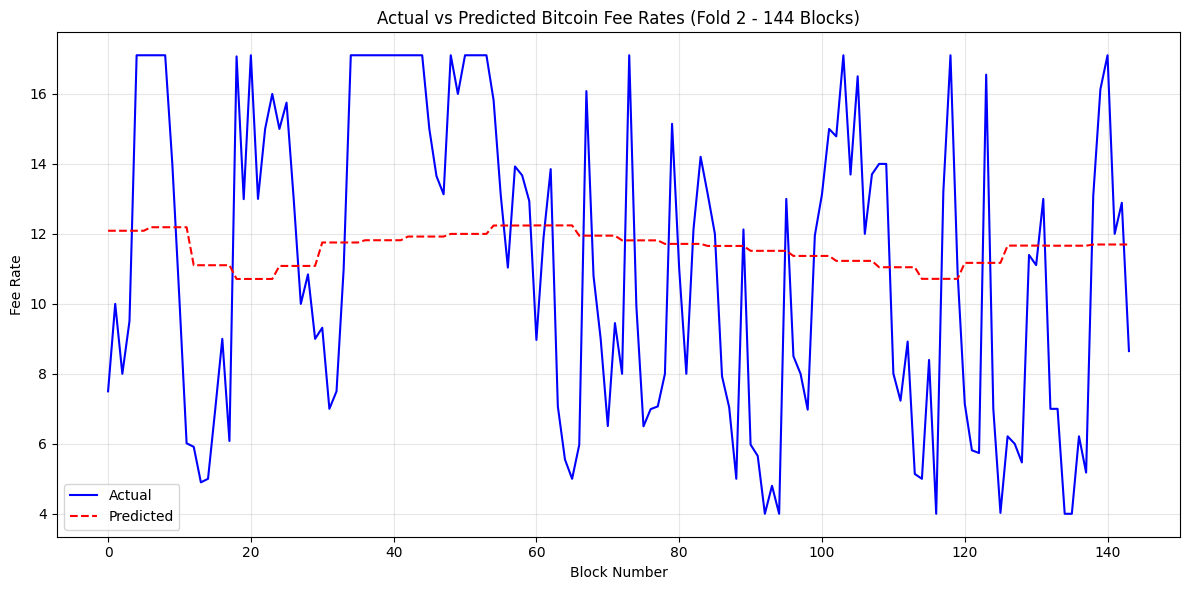


Training fold 3/5

Fold 3 Metrics:
MAE: 2.5615
RMSE: 3.1212
R²: 0.0256
MAPE: 36.4302%
Directional Accuracy: 50.3497%
Theil's U: 0.5121


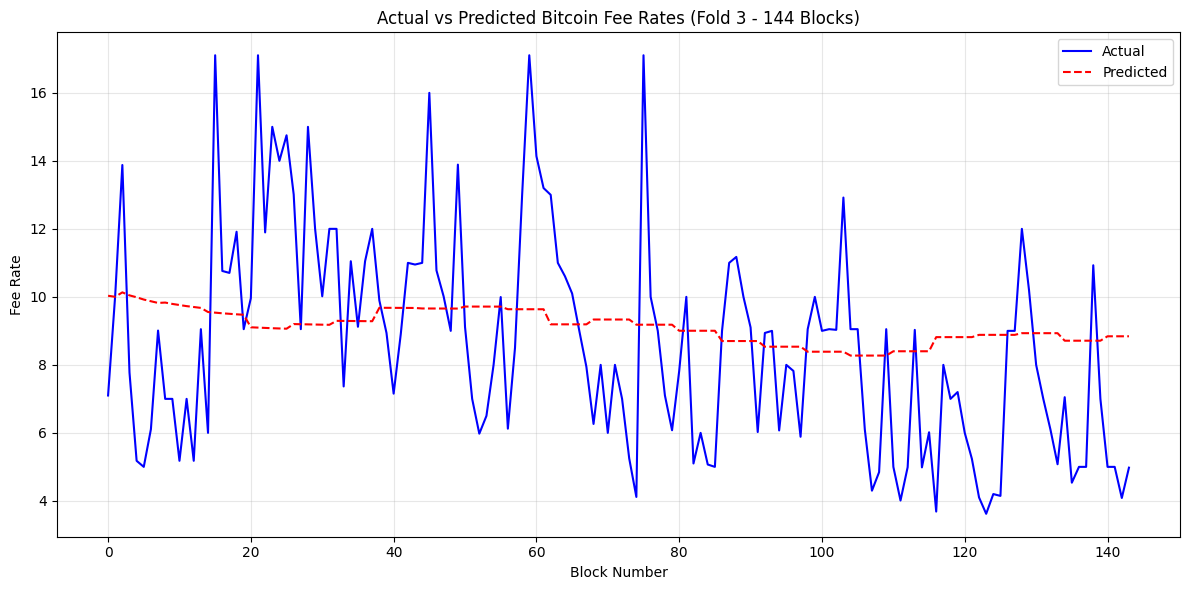


Training fold 4/5

Fold 4 Metrics:
MAE: 2.1975
RMSE: 3.3379
R²: -0.3254
MAPE: 29.9479%
Directional Accuracy: 43.3566%
Theil's U: 0.6086


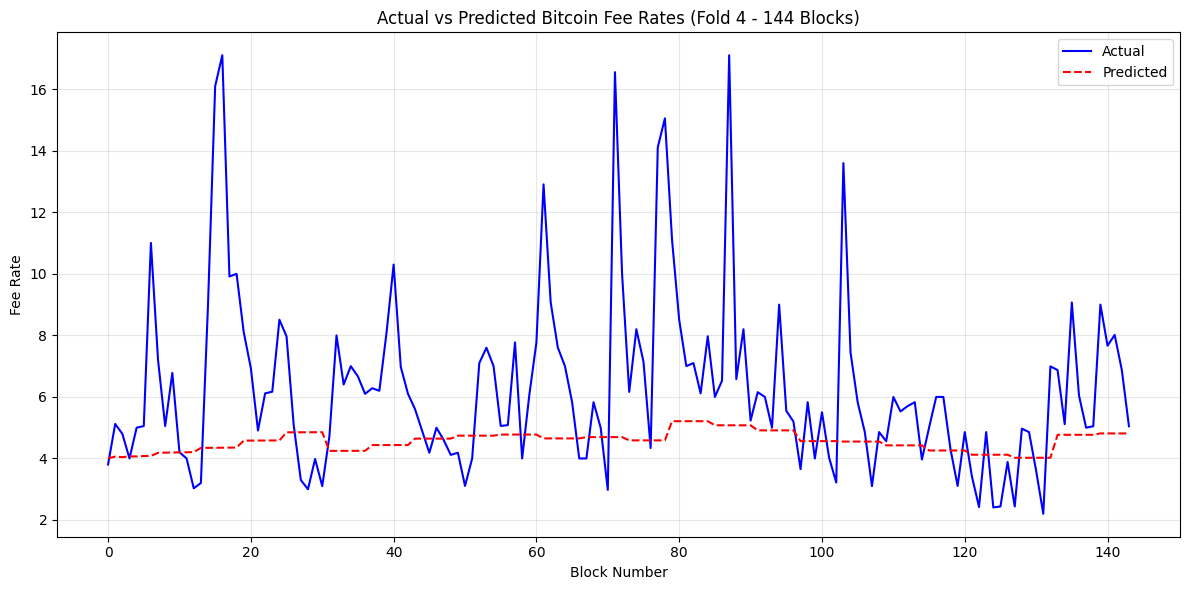


Training fold 5/5

Fold 5 Metrics:
MAE: 2.7092
RMSE: 3.5053
R²: 0.0025
MAPE: 66.4119%
Directional Accuracy: 39.8601%
Theil's U: 0.6048


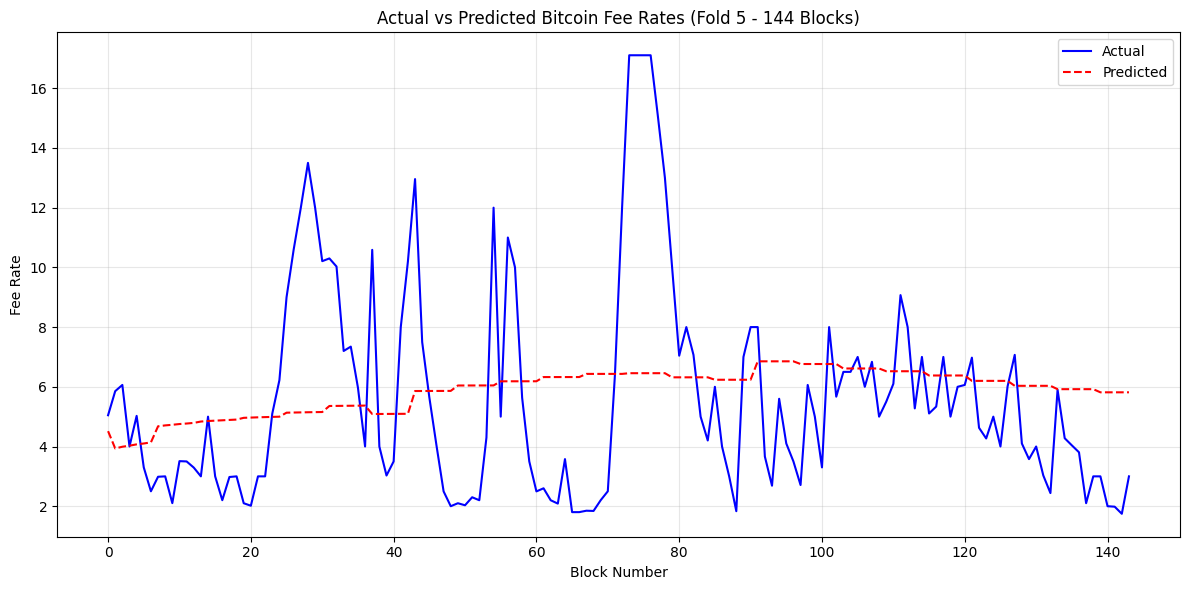

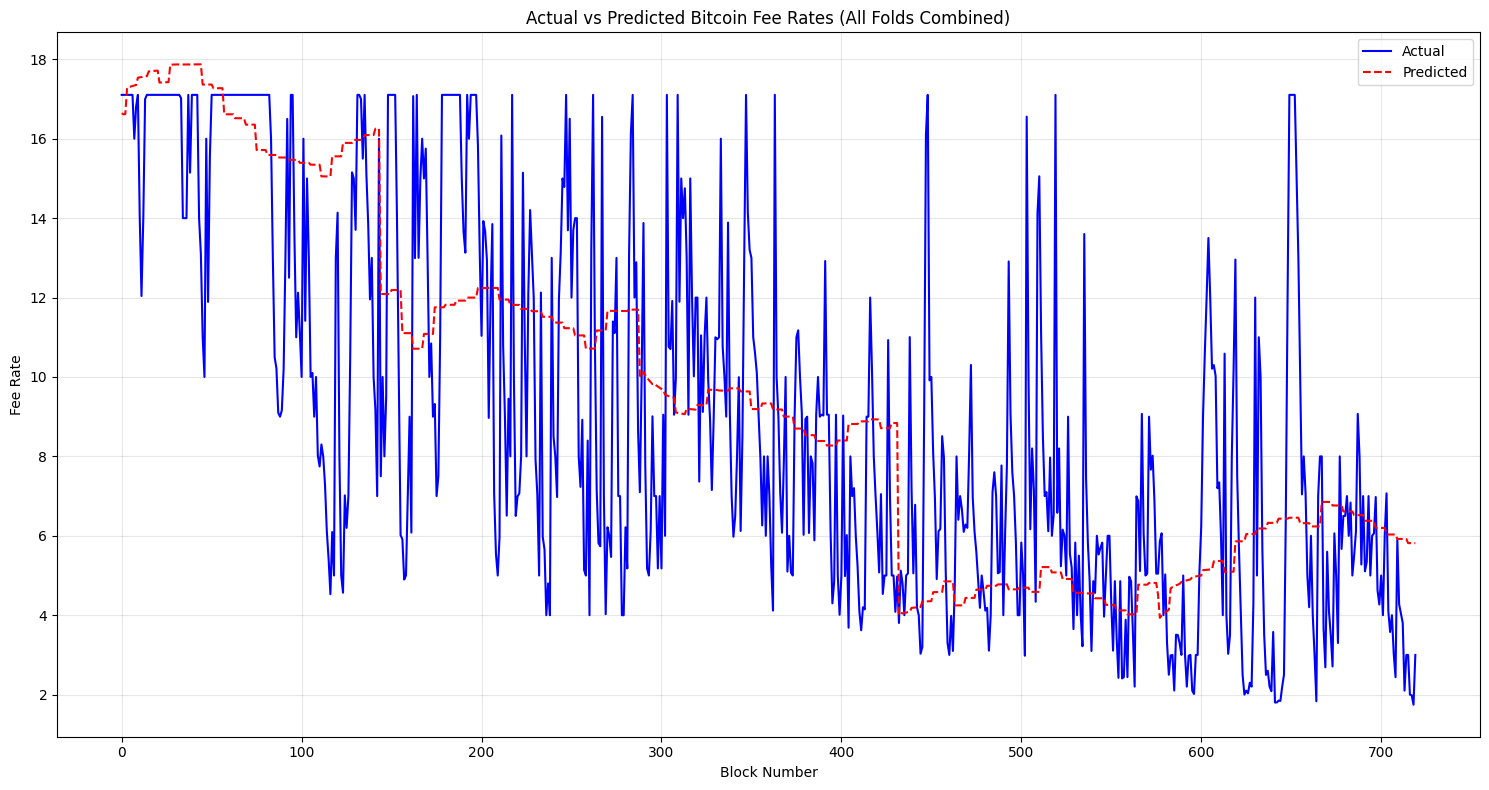


Detailed metrics for each fold:
   Fold    MAE   RMSE      R2    MAPE  DirectionalAccuracy  TheilsU
0     1 2.7266 4.0248 -0.1452 31.1080              31.4685   0.6614
1     2 3.8658 4.3439  0.0081 46.8213               8.3916   0.5057
2     3 2.5615 3.1212  0.0256 36.4302              50.3497   0.5121
3     4 2.1975 3.3379 -0.3254 29.9479              43.3566   0.6086
4     5 2.7092 3.5053  0.0025 66.4119              39.8601   0.6048

Final Cross-Validation Performance with Best Parameters:
MAE: 2.8121 (±0.5601)
RMSE: 3.6666 (±0.4513)
R2: -0.0869 (±0.1341)
MAPE: 42.1439 (±13.5203)
DA: 34.6853 (±14.4848)
THEIL_U: 0.5785 (±0.0603)

Total execution time: 346.45 seconds

Saving results...
Results saved successfully!


In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import time
import random
import ast
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

def set_seed(seed=42):
    """Set random seeds for reproducibility"""
    random.seed(seed)
    np.random.seed(seed)

def preprocess_and_check_data(df):
    """Preprocess and validate data"""
    print("Checking and preprocessing data...")
    
    # Check for NaN values
    if df.isnull().any().any():
        print("Warning: NaN values found in data")
        df = df.fillna(method='ffill').fillna(method='bfill')
    
    # Check for infinite values
    if np.isinf(df.select_dtypes(include=np.number)).any().any():
        print("Warning: Infinite values found in data")
        df = df.replace([np.inf, -np.inf], np.nan)
        df = df.fillna(method='ffill').fillna(method='bfill')
    
    # Ensure target variable is positive (for MAPE calculation)
    if (df['block_median_fee_rate'] <= 0).any():
        print("Warning: Non-positive values found in target variable")
        df = df[df['block_median_fee_rate'] > 0]
    
    return df
    
def preprocess_list_columns(df):
    """Convert string representations of lists to actual numerical features"""
    list_columns = []
    
    # Identify columns containing lists
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                if isinstance(ast.literal_eval(df[col].iloc[0]), list):
                    list_columns.append(col)
            except (ValueError, SyntaxError):
                continue
    
    # Process list columns
    for col in list_columns:
        try:
            # Convert string representations to actual lists
            lists = df[col].apply(ast.literal_eval)
            
            # Create new features from lists
            df[f'{col}_mean'] = lists.apply(lambda x: np.mean(x))
            df[f'{col}_std'] = lists.apply(lambda x: np.std(x))
            df[f'{col}_max'] = lists.apply(lambda x: max(x))
            df[f'{col}_min'] = lists.apply(lambda x: min(x))
            df[f'{col}_range'] = lists.apply(lambda x: max(x) - min(x))
            df[f'{col}_sum'] = lists.apply(lambda x: sum(x))
            
            # Drop the original list column
            df = df.drop(columns=[col])
        except Exception as e:
            print(f"Warning: Error processing list column {col}: {str(e)}")
            continue
    
    return df

def create_advanced_features(df):
    """Create advanced features including time-based and rolling statistics"""
    print("Creating advanced features...")
    
    try:
        # First preprocess any list columns
        df = preprocess_list_columns(df)
        
        # Time-based features
        df['hour_sin'] = np.sin(2 * np.pi * df.index.hour / 24)
        df['hour_cos'] = np.cos(2 * np.pi * df.index.hour / 24)
        df['day_sin'] = np.sin(2 * np.pi * df.index.dayofweek / 7)
        df['day_cos'] = np.cos(2 * np.pi * df.index.dayofweek / 7)
        
        # Get numerical columns
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        
        # Calculate block interval
        avg_interval = df.index.to_series().diff().mean().total_seconds() / 60
        BLOCK_INTERVAL_MINUTES = round(avg_interval)
        TIME_WINDOWS_HOURS = [1, 2, 4]  # Desired time windows in hours
        
        # Calculate windows based on actual data frequency
        windows = [int((60 * hours) / BLOCK_INTERVAL_MINUTES) for hours in TIME_WINDOWS_HOURS]
        print(f"Using rolling windows of {windows} blocks for {TIME_WINDOWS_HOURS} hour periods")
        
        # Rolling statistics for numerical columns
        for col in numeric_cols:
            if col != 'block_median_fee_rate':  # Skip target variable
                for window, hours in zip(windows, TIME_WINDOWS_HOURS):
                    df[f'{col}_mean_{hours}h'] = df[col].rolling(window=window, min_periods=1).mean()
                    df[f'{col}_std_{hours}h'] = df[col].rolling(window=window, min_periods=1).std()
        
        # Feature interactions
        if 'mempool_size_mb' in df.columns and 'transaction_count' in df.columns:
            df['mempool_pressure'] = df['mempool_size_mb'] * df['transaction_count']
        
        if 'bitcoin_price_usd' in df.columns:
            df['price_volatility'] = df['bitcoin_price_usd'].pct_change().rolling(12, min_periods=1).std()
        
        # Fill NaN values
        for col in df.columns:
            if col.endswith(('_mean', '_std', '_volatility')):
                df[col] = df[col].fillna(method='bfill').fillna(method='ffill')
            else:
                df[col] = df[col].fillna(df[col].mean())
        
        return df
    
    except Exception as e:
        print(f"Error in feature creation: {str(e)}")
        raise

def forecast_exog_advanced(X, steps):
    """Forecast exogenous variables for future predictions"""
    try:
        forecast = pd.DataFrame(index=pd.date_range(start=X.index[-1] + pd.Timedelta(minutes=10), 
                                                  periods=steps, freq='10T'))
        
        for col in X.columns:
            if col.startswith(('hour_', 'day_')):
                if 'hour_' in col:
                    hour = forecast.index.hour
                    forecast[col] = np.sin(2 * np.pi * hour / 24) if 'sin' in col else np.cos(2 * np.pi * hour / 24)
                else:
                    day = forecast.index.dayofweek
                    forecast[col] = np.sin(2 * np.pi * day / 7) if 'sin' in col else np.cos(2 * np.pi * day / 7)
            else:
                # Use exponential smoothing for numerical features
                alpha = 0.7
                last_values = X[col].iloc[-10:]
                smoothed_value = last_values.ewm(alpha=alpha).mean().iloc[-1]
                forecast[col] = smoothed_value
        
        return forecast
    
    except Exception as e:
        print(f"Error in forecasting exogenous variables: {str(e)}")
        raise
class HybridModel:
    """Hybrid model combining SARIMAX and Gradient Boosting"""
    def __init__(self, sarimax_order=(1,1,1), gb_params=None):
        self.sarimax_order = sarimax_order
        self.sarimax_model = None
        
        default_gb_params = {
            'n_estimators': 100,
            'learning_rate': 0.1,
            'max_depth': 3,
            'subsample': 0.8,
            'random_state': 42
        }
        
        
        if gb_params is not None:
            default_gb_params.update(gb_params)
            
        self.gb_model = GradientBoostingRegressor(**default_gb_params)
        
    def fit(self, y, exog):
        try:
            # Convert to numpy arrays
            y = np.array(y)
            exog = np.array(exog)
            
            # Fit SARIMAX
            self.sarimax_model = SARIMAX(y, exog=exog, order=self.sarimax_order)
            self.sarimax_results = self.sarimax_model.fit(disp=False)
            
            # Get SARIMAX residuals
            sarimax_pred = self.sarimax_results.get_prediction(start=0, exog=exog)
            residuals = y - sarimax_pred.predicted_mean
            
            # Check for NaN values
            if np.any(np.isnan(residuals)):
                raise ValueError("NaN values in SARIMAX residuals")
            
            # Fit GradientBoosting on residuals
            self.gb_model.fit(exog, residuals)
            
        except Exception as e:
            print(f"Error in model fitting: {str(e)}")
            raise
        
    def predict(self, exog):
        try:
            sarimax_pred = self.sarimax_results.get_prediction(
                start=len(self.sarimax_results.fittedvalues), 
                end=len(self.sarimax_results.fittedvalues) + len(exog) - 1,
                exog=exog
            )
            gb_pred = self.gb_model.predict(exog)
            return sarimax_pred.predicted_mean + gb_pred
        
        except Exception as e:
            print(f"Error in prediction: {str(e)}")
            raise

# Evaluation Metrics
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error with proper handling of types"""
    y_true = np.array(y_true).astype(float)
    y_pred = np.array(y_pred).astype(float)
    
    # Handle division by zero
    mask = y_true != 0
    if not np.any(mask):
        return float('inf')
    
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def directional_accuracy(y_true, y_pred):
    """Calculate Directional Accuracy"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean((np.diff(y_true) * np.diff(y_pred)) > 0) * 100

def theil_u(y_true, y_pred):
    """Calculate Theil's U statistic"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    y_true_pct = (y_true[1:] - y_true[:-1]) / y_true[:-1]
    y_pred_pct = (y_pred[1:] - y_true[:-1]) / y_true[:-1]
    
    numerator = np.sqrt(np.mean((y_true_pct - y_pred_pct)**2))
    denominator = np.sqrt(np.mean(y_true_pct**2)) + np.sqrt(np.mean(y_pred_pct**2))
    
    return numerator / denominator

# Plotting Functions
def plot_fold_results(y_true, y_pred, fold_idx):
    """Plot results for a single fold"""
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_true)), y_true, label='Actual', color='blue')
    plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='--')
    plt.title(f'Actual vs Predicted Bitcoin Fee Rates (Fold {fold_idx + 1} - 144 Blocks)')
    plt.xlabel('Block Number')
    plt.ylabel('Fee Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_all_folds(all_y_true, all_y_pred):
    """Plot results for all folds combined"""
    plt.figure(figsize=(15, 8))
    plt.plot(range(len(all_y_true)), all_y_true, label='Actual', color='blue')
    plt.plot(range(len(all_y_pred)), all_y_pred, label='Predicted', color='red', linestyle='--')
    plt.title('Actual vs Predicted Bitcoin Fee Rates (All Folds Combined)')
    plt.xlabel('Block Number')
    plt.ylabel('Fee Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    
def run_model_with_best_params(df, test_size=144, n_splits=5):
    """Run cross-validation with the best parameters found from previous tuning"""
    try:
        # Prepare data
        print("Preparing data and engineering features...")
        df = create_advanced_features(df)
        features = [col for col in df.columns if col != 'block_median_fee_rate']
        target = 'block_median_fee_rate'
        
        X = df[features]
        y = df[target]
        
        # Scale features
        print("Scaling features...")
        scaler = RobustScaler()
        X_scaled = pd.DataFrame(
            scaler.fit_transform(X),
            columns=X.columns,
            index=X.index
        )
        
        # Best parameters from previous tuning
        # best_sarimax_order = (3, 0, 1)  # p, d, q
        best_sarimax_order = (3, 0, 3)
        
        # best_gb_params = {
        #     'n_estimators': 145,
        #     'learning_rate': 0.1477904886684632,
        #     'max_depth': 2,
        #     'subsample': 0.8044950252252036,
        #     'min_samples_split': 6,
        #     'min_samples_leaf': 4,
        #     'random_state': 42
        # }
        best_gb_params = {
            'n_estimators': 232,
            'learning_rate': 0.29540444469518157,
            'max_depth': 3,
            'subsample': 0.6803062149077873,
            'min_samples_split': 12,
            'min_samples_leaf': 4,
            'random_state': 42
        }      
        
        
        # Run cross-validation with best parameters
        print("\nRunning cross-validation with best parameters...")
        metrics = {metric: [] for metric in ['mae', 'rmse', 'r2', 'mape', 'da', 'theil_u']}
        all_y_true = []
        all_y_pred = []
        
        n_total = len(X_scaled)
        for fold_idx in range(n_splits):
            print(f"\nTraining fold {fold_idx+1}/{n_splits}")
            
            train_end = n_total - (n_splits - fold_idx) * test_size
            test_start = train_end
            test_end = test_start + test_size
            
            # Split data
            train_X = X_scaled.iloc[:train_end]
            train_y = y.iloc[:train_end]
            test_y = y.iloc[test_start:test_end]
            
            # Initialize and fit model with best parameters
            model = HybridModel(sarimax_order=best_sarimax_order, gb_params=best_gb_params)
            model.fit(train_y, train_X)
            
            # Generate forecasts
            future_exog = forecast_exog_advanced(train_X, test_size)
            predictions = model.predict(future_exog)
            
            # Store and evaluate results
            y_true = test_y.values[:test_size]
            y_pred = predictions[:test_size]
            
            all_y_true.extend(y_true)
            all_y_pred.extend(y_pred)
            
            # Calculate metrics
            metrics['mae'].append(mean_absolute_error(y_true, y_pred))
            metrics['rmse'].append(np.sqrt(mean_squared_error(y_true, y_pred)))
            metrics['r2'].append(r2_score(y_true, y_pred))
            metrics['mape'].append(mean_absolute_percentage_error(y_true, y_pred))
            metrics['da'].append(directional_accuracy(y_true, y_pred))
            metrics['theil_u'].append(theil_u(y_true, y_pred))
            
            # Print metrics for current fold
            print(f"\nFold {fold_idx + 1} Metrics:")
            print(f"MAE: {metrics['mae'][-1]:.4f}")
            print(f"RMSE: {metrics['rmse'][-1]:.4f}")
            print(f"R²: {metrics['r2'][-1]:.4f}")
            print(f"MAPE: {metrics['mape'][-1]:.4f}%")
            print(f"Directional Accuracy: {metrics['da'][-1]:.4f}%")
            print(f"Theil's U: {metrics['theil_u'][-1]:.4f}")
            
            # Plot results for current fold
            plot_fold_results(y_true, y_pred, fold_idx)
        
        # Plot all folds combined
        plot_all_folds(all_y_true, all_y_pred)
        
        # Create DataFrame with metrics for each fold
        metrics_df = pd.DataFrame({
            'Fold': range(1, n_splits + 1),
            'MAE': metrics['mae'],
            'RMSE': metrics['rmse'],
            'R2': metrics['r2'],
            'MAPE': metrics['mape'],
            'DirectionalAccuracy': metrics['da'],
            'TheilsU': metrics['theil_u']
        })
        
        print("\nDetailed metrics for each fold:")
        print(metrics_df)
        
        # Print final results
        print("\nFinal Cross-Validation Performance with Best Parameters:")
        for metric, values in metrics.items():
            print(f"{metric.upper()}: {np.mean(values):.4f} (±{np.std(values):.4f})")
        
        return metrics, all_y_true, all_y_pred, metrics_df
    
    except Exception as e:
        print(f"Error in model evaluation: {str(e)}")
        raise

if __name__ == "__main__":
    try:
        # Load data
        print("Loading data...")
        df = pd.read_csv('real_time_cleaned.csv')
        df['block_time'] = pd.to_datetime(df['block_time'])
        df = df.sort_values('block_time').set_index('block_time')
        
        # Preprocess data
        df = preprocess_and_check_data(df)

        # Set random seed and start timer
        set_seed(42)
        start = time.time()

        # Run cross-validation with best parameters
        metrics, all_y_true, all_y_pred, metrics_df = run_model_with_best_params(
            df, 
            test_size=144, 
            n_splits=5
        )

        # Print execution time
        end = time.time()
        print(f"\nTotal execution time: {end-start:.2f} seconds")

        # Save results
        print("\nSaving results...")
        
        # Save metrics
        metrics_df.to_csv('cross_validation_metrics_best_params.csv', index=False)
        
        # Save predictions
        predictions_df = pd.DataFrame({
            'actual': all_y_true,
            'predicted': all_y_pred
        })
        predictions_df.to_csv('predictions_best_params.csv', index=False)
        
        print("Results saved successfully!")
        
    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        raise

The splits work like this (assuming 5000 records total):

Fold 1: Train on [0:4424], Test on [4424:4568]
Fold 2: Train on [0:4568], Test on [4568:4712]
Fold 3: Train on [0:4712], Test on [4712:4856]
Fold 4: Train on [0:4856], Test on [4856:5000]
Fold 5: Train on [0:5000], Test on [5000:5144]

Each fold:

Uses ALL historical data up to the test period
Tests on next 144 points
Moves forward in time


For New Data (Production):
With new data, you would use the same approach but with the best parameters found:

def predict_new_data(new_data):
    # Use the best parameters found from previous tuning
    best_sarimax_order = (3, 0, 3)
    best_gb_params = {
        'n_estimators': 232,
        'learning_rate': 0.29540444469518157,
        'max_depth': 3,
        'subsample': 0.6803062149077873,
        'min_samples_split': 12,
        'min_samples_leaf': 4,
        'random_state': 42
    }

    # Initialize model with best parameters
    model = HybridModel(sarimax_order=best_sarimax_order, 
                       gb_params=best_gb_params)
    
    # Train on all available historical data
    # (not just last 1000 points)
    model.fit(historical_y, historical_X)
    
    # Generate predictions for next 144 blocks
    future_exog = forecast_exog_advanced(historical_X, 144)
    predictions = model.predict(future_exog)


Preparing data and engineering features...
Creating advanced features...
Using rolling windows of [6, 12, 24] blocks for [1, 2, 4] hour periods
Scaling features...

Training model on full dataset...

Generating predictions for next 144 blocks...


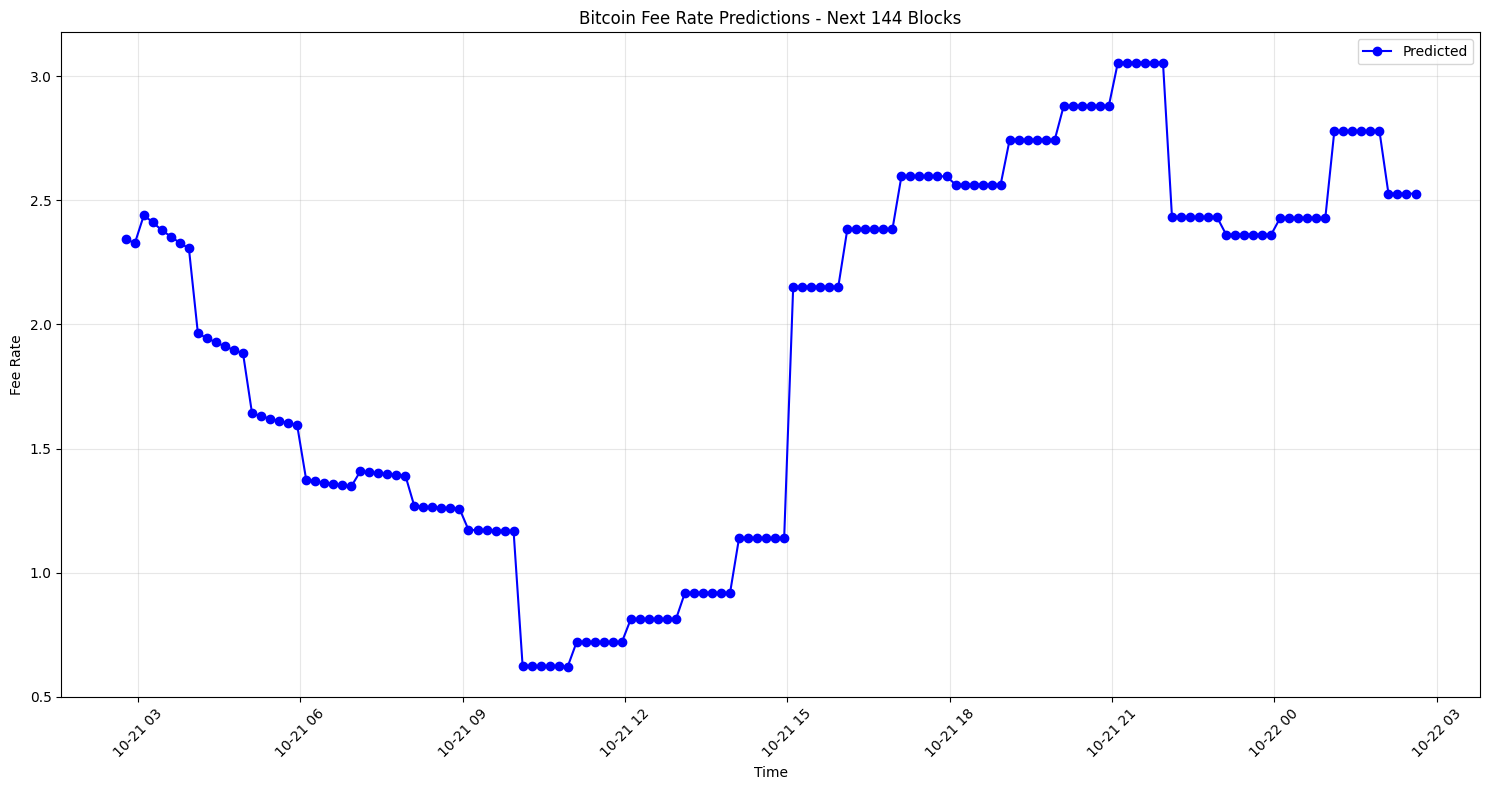


Predictions saved to 'future_fee_predictions.csv'

Prediction process completed successfully!


In [13]:
def predict_future_fees(df, prediction_blocks=144):
    """Train model on full dataset and predict future fee rates"""
    try:
        print("Preparing data and engineering features...")
        df = create_advanced_features(df)
        features = [col for col in df.columns if col != 'block_median_fee_rate']
        target = 'block_median_fee_rate'
        
        X = df[features]
        y = df[target]
        
        print("Scaling features...")
        scaler = RobustScaler()
        X_scaled = pd.DataFrame(
            scaler.fit_transform(X),
            columns=X.columns,
            index=X.index
        )
        
        # Best parameters from previous tuning
        best_sarimax_order = (3, 0, 3)
        best_gb_params = {
            'n_estimators': 232,
            'learning_rate': 0.29540444469518157,
            'max_depth': 3,
            'subsample': 0.6803062149077873,
            'min_samples_split': 12,
            'min_samples_leaf': 4,
            'random_state': 42
        }
        
        print("\nTraining model on full dataset...")
        model = HybridModel(sarimax_order=best_sarimax_order, gb_params=best_gb_params)
        model.fit(y, X_scaled)
        
        print("\nGenerating predictions for next 144 blocks...")
        future_exog = forecast_exog_advanced(X_scaled, prediction_blocks)
        predictions = model.predict(future_exog)
        
        # Create DataFrame with predictions
        results_df = pd.DataFrame({
            'timestamp': future_exog.index,
            'predicted_fee_rate': predictions
        })
        
        # Plot predictions
        plt.figure(figsize=(15, 8))
        plt.plot(results_df['timestamp'], results_df['predicted_fee_rate'], 
                label='Predicted', color='blue', marker='o')
        plt.title('Bitcoin Fee Rate Predictions - Next 144 Blocks')
        plt.xlabel('Time')
        plt.ylabel('Fee Rate')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Save predictions to CSV
        results_df.to_csv('future_fee_predictions.csv', index=False)
        print("\nPredictions saved to 'future_fee_predictions.csv'")
        
        return results_df
        
    except Exception as e:
        print(f"Error in prediction process: {str(e)}")
        raise

# Run the prediction
if __name__ == "__main__":
    # Use the already loaded and preprocessed df
    predictions_df = predict_future_fees(df, prediction_blocks=144)
    print("\nPrediction process completed successfully!")

Loading data...

Checking for NaN values in actual data before processing:
1 NaN values found

Checking for NaN values in predictions before processing:
0 NaN values found

Data lengths after processing:
Number of actual values: 144
Number of predicted values: 144

Final NaN check:
NaN in actual values: False
NaN in predicted values: False

First 5 comparisons:
   sequence  actual_fee_rate  predicted_fee_rate
0         0           4.1000              2.3461
1         1           3.0047              2.3267
2         2           3.1000              2.4398
3         3           3.0000              2.4118
4         4           3.3000              2.3795

Last 5 comparisons:
     sequence  actual_fee_rate  predicted_fee_rate
139       139          17.0000              2.7798
140       140          14.0000              2.5274
141       141          21.0000              2.5274
142       142          14.2000              2.5274
143       143          18.0000              2.5274

Value ranges:


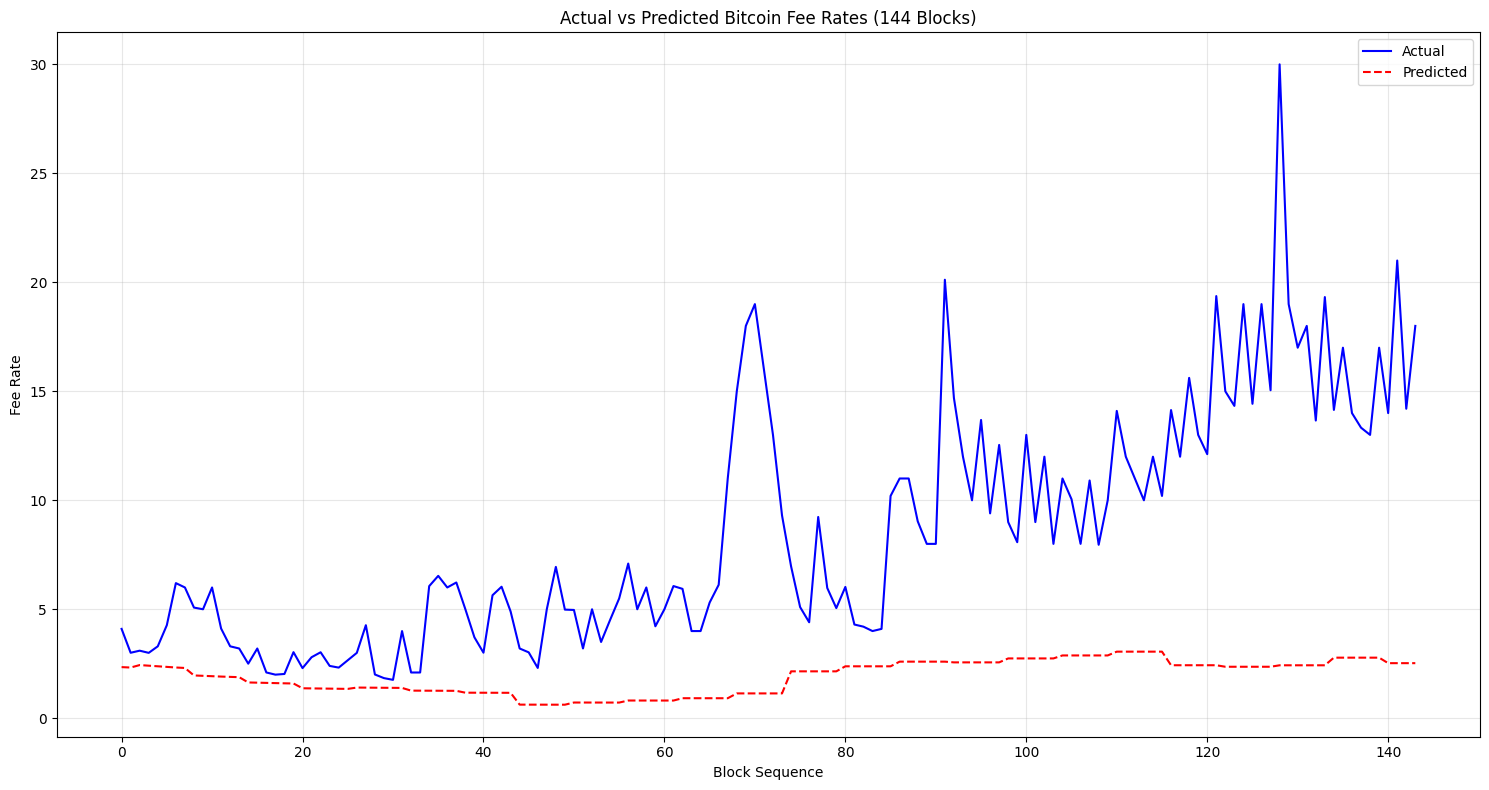


Model Performance Metrics:
              Metric   Value
                 MAE  6.6007
                RMSE  8.3652
                  R² -1.3305
                MAPE 69.4261
Directional Accuracy 57.3427
           Theil's U  0.7661

Worst 5 Predictions (highest percentage error):
     sequence  actual_fee_rate  predicted_fee_rate  percentage_error
70         70          19.0000              1.1398           94.0013
69         69          18.0000              1.1398           93.6676
71         71          16.0000              1.1397           92.8771
68         68          15.0000              1.1399           92.4004
128       128          30.0000              2.4297           91.9011

Best 5 Predictions (lowest percentage error):
    sequence  actual_fee_rate  predicted_fee_rate  percentage_error
17        17           2.0000              1.6113           19.4343
3          3           3.0000              2.4118           19.6068
30        30           1.7619              1.3942      

In [20]:
# Load the data
print("Loading data...")
actual_df = pd.read_csv('real_time.csv')
predictions_df = pd.read_csv('future_fee_predictions.csv')

# Get blocks starting from 866632 and handle NaN values
actual_df = actual_df[actual_df['block_height'] >= 866632].copy()
actual_df = actual_df.sort_values('block_height')

# Check for and handle NaN values
print("\nChecking for NaN values in actual data before processing:")
print(actual_df['block_median_fee_rate'].isnull().sum(), "NaN values found")

print("\nChecking for NaN values in predictions before processing:")
print(predictions_df['predicted_fee_rate'].isnull().sum(), "NaN values found")

# Fill or remove NaN values
actual_df['block_median_fee_rate'] = actual_df['block_median_fee_rate'].fillna(method='ffill')
predictions_df['predicted_fee_rate'] = predictions_df['predicted_fee_rate'].fillna(method='ffill')

# Get exactly 144 values
actual_values = actual_df['block_median_fee_rate'].values[:144]
predicted_values = predictions_df['predicted_fee_rate'].values[:144]

print(f"\nData lengths after processing:")
print(f"Number of actual values: {len(actual_values)}")
print(f"Number of predicted values: {len(predicted_values)}")

# Final NaN check
print("\nFinal NaN check:")
print("NaN in actual values:", np.isnan(actual_values).any())
print("NaN in predicted values:", np.isnan(predicted_values).any())

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'sequence': range(144),
    'actual_fee_rate': actual_values,
    'predicted_fee_rate': predicted_values
})

print("\nFirst 5 comparisons:")
print(comparison_df.head())
print("\nLast 5 comparisons:")
print(comparison_df.tail())

print("\nValue ranges:")
print(f"Actual values range: [{actual_values.min():.2f}, {actual_values.max():.2f}]")
print(f"Predicted values range: [{predicted_values.min():.2f}, {predicted_values.max():.2f}]")

# Calculate metrics
mae = mean_absolute_error(actual_values, predicted_values)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
r2 = r2_score(actual_values, predicted_values)
mape = mean_absolute_percentage_error(actual_values, predicted_values)
da = directional_accuracy(actual_values, predicted_values)
theil_u_value = theil_u(actual_values, predicted_values)

metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²', 'MAPE', 'Directional Accuracy', "Theil's U"],
    'Value': [mae, rmse, r2, mape, da, theil_u_value]
})

# Plot actual vs predicted
plt.figure(figsize=(15, 8))
plt.plot(range(144), actual_values, label='Actual', color='blue')
plt.plot(range(144), predicted_values, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Bitcoin Fee Rates (144 Blocks)')
plt.xlabel('Block Sequence')
plt.ylabel('Fee Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate errors
comparison_df['absolute_error'] = abs(comparison_df['predicted_fee_rate'] - comparison_df['actual_fee_rate'])
comparison_df['percentage_error'] = (comparison_df['absolute_error'] / comparison_df['actual_fee_rate']) * 100

print("\nModel Performance Metrics:")
print(metrics_df.to_string(index=False))

print("\nWorst 5 Predictions (highest percentage error):")
print(comparison_df.nlargest(5, 'percentage_error')[
    ['sequence', 'actual_fee_rate', 'predicted_fee_rate', 'percentage_error']
])

print("\nBest 5 Predictions (lowest percentage error):")
print(comparison_df.nsmallest(5, 'percentage_error')[
    ['sequence', 'actual_fee_rate', 'predicted_fee_rate', 'percentage_error']
])

# Error distribution statistics
print("\nError Distribution:")
print(comparison_df[['absolute_error', 'percentage_error']].describe())

# Save results
comparison_df.to_csv('sequential_comparison_144.csv', index=False)
metrics_df.to_csv('sequential_metrics_144.csv', index=False)

print("\nResults saved to CSV files")

 for time series data, especially for Bitcoin fee prediction, you can't have gaps in your training data! 
 

Problems with gaps:

Time-based features would be incorrect
Rolling statistics would be invalid
SARIMAX assumes continuous time series
Historical patterns and trends would be broken


Recommendations:

Always try to maintain data continuity
If gap exists:

Try to fetch missing data first
If can't get missing data, use only new continuous data if it's sufficient (e.g., >1000 blocks)
Document any gaps and changes in prediction methodology


Retrain model regularly to maintain prediction quality

The key is ensuring your time series data is continuous within whatever period you're using for training. Gaps in the data will lead to incorrect predictions because the model relies on continuous patterns and relationships in the time series.






suggestion for next steps: it looks like all the models are aggressively smoothing the data. It would be good to offer an interpretation of whether this level of smoothing is still useful in practice for this application


suggested to use GARCH and any other method that is focused on variance, since the smoothness in your predictions vs actuals indicate a lot of volatility in this predict. 